## Preprocessing

In [586]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [587]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df = application_df.drop(columns = ['EIN'])
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [588]:
# Determine the number of unique values in each column.
application_df.nunique()

,0
NAME,19568
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747


In [589]:
#Looking at value counts of NAME to identify and replace with "Other"
name = application_df.NAME.value_counts()
name

,count
NAME,
PARENT BOOSTER USA INC,1260
TOPS CLUB INC,765
UNITED STATES BOWLING CONGRESS INC,700
WASHINGTON STATE UNIVERSITY,492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,408
...,...
ST LOUIS SLAM WOMENS FOOTBALL,1
AIESEC ALUMNI IBEROAMERICA CORP,1
WEALLBLEEDRED ORG INC,1


In [590]:
# Using the code below to be able to see all NAME value counts
name[name > 50]

,count
NAME,
PARENT BOOSTER USA INC,1260
TOPS CLUB INC,765
UNITED STATES BOWLING CONGRESS INC,700
WASHINGTON STATE UNIVERSITY,492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,408
PTA TEXAS CONGRESS,368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,331
ALPHA PHI SIGMA,313
TOASTMASTERS INTERNATIONAL,293


In [591]:
# Creating a bin to group rare occurrences
names_to_replace = list(name[name < 100].index)

# Replace in dataframe
for app in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(app,"Other")

In [592]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
apps = application_df.APPLICATION_TYPE.value_counts()
apps

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [593]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = apps[apps < 500].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [594]:
# Adding AFFILIATION value counts to identify and replace with "Other"
affiliation = application_df.AFFILIATION.value_counts()
affiliation

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Family/Parent,64
National,33
Regional,13
Other,4


In [595]:
# Choose a cutoff value and create a list of AFFILIATION types to be replaced
# use the variable name `affiliation_types_to_replace`
affiliation_types_to_replace = affiliation[affiliation < 100].index

# Replace in dataframe
for aff in affiliation_types_to_replace:
    application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(aff,"Other")

# Check to make sure replacement was successful
application_df['AFFILIATION'].value_counts()

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Other,114


In [596]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [597]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count[classification_count>1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [598]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_count[classification_count < 200].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
Other,1197
C7000,777
C1700,287


In [599]:
# Adding USE_CASE value counts to identify and replace with "Other"
#use_case = application_df.USE_CASE.value_counts()
#use_case

In [600]:
# Choose a cutoff value and create a list of USE_CASE to be replaced
# use the variable name `use_case_to_replace`
#use_case_to_replace = use_case[use_case < 500].index

# Replace in dataframe
#for ucs in use_case_to_replace:
 #   application_df['USE_CASE'] = application_df['USE_CASE'].replace(ucs,"Other")

# Check to make sure replacement was successful
#application_df['USE_CASE'].value_counts()

In [601]:
# Adding ORGANIZATION value counts to identify and replace with "Other"
#org = application_df.ORGANIZATION.value_counts()
#org

In [602]:
# Choose a cutoff value and create a list of ORGANIZATION to be replaced
# use the variable name `org_to_replace`
#org_to_replace = org[org < 500].index

# Replace in dataframe
#for orgg in org_to_replace:
#    application_df['ORGANIZATION'] = application_df['ORGANIZATION'].replace(orgg,"Other")

# Check to make sure replacement was successful
#application_df['ORGANIZATION'].value_counts()

In [603]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=int)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [604]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [605]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [606]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=140, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=135, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                     │ (None, 140)                 │          10,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 135)                 │          19,035 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,531 (115.36 KB)

 Trainable params: 29,531 (115.36 KB)

 Non-trainable params: 0 (0.00 B)

In [607]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [608]:
# Create a callback that saves the model's weights every 5 epochs
checkpoint = ModelCheckpoint(
    'model.weights.h5',  # File name to save the weights
    save_weights_only=True,  # Save only the weights
    save_freq='epoch',  # Save weights every epoch
)

In [609]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=45, callbacks=[checkpoint], validation_split=0.2 )

Epoch 1/45
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7262 - loss: 0.5315 - val_accuracy: 0.7594 - val_loss: 0.4969
Epoch 2/45
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7559 - loss: 0.4926 - val_accuracy: 0.7561 - val_loss: 0.4963
Epoch 3/45
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7559 - loss: 0.4934 - val_accuracy: 0.7570 - val_loss: 0.4922
Epoch 4/45
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7552 - loss: 0.4897 - val_accuracy: 0.7590 - val_loss: 0.4952
Epoch 5/45
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7593 - loss: 0.4860 - val_accuracy: 0.7588 - val_loss: 0.4942
Epoch 6/45
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7662 - loss: 0.4781 - val_accuracy: 0.7576 - val_loss: 0.4952
Epoch 7/45
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7604 - loss: 0.4866 - val_accuracy: 0.7545 - val_loss: 0.4955
Epoch 8/45
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7623 - loss: 0.4823 - val_accuracy: 0.

In [613]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7546 - loss: 0.5028
Loss: 0.5028257966041565, Accuracy: 0.7546355724334717


In [614]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')

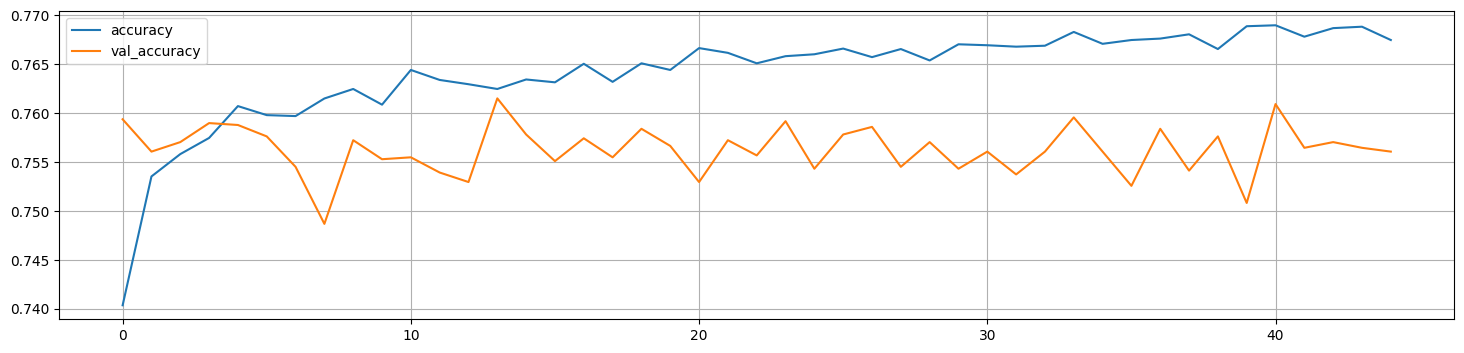

In [615]:
# create a DataFrame from the training history of a model and then plot the accuracy and validation accuracy over epochs
pd.DataFrame(fit_model.history)[['accuracy','val_accuracy']].plot(grid=True, figsize=(18,4));